In [2]:
import pandas as pd 
import numpy as np 
import matplotlib_inline 
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("wether_prediction.csv")
df.head()

,Unnamed: 0,temperature_celsius,feels_like,air_quality,humidity,precipitation,visibility,wind_speed,pressure,condition_text
0,0,27.5,29.7,243.7,67,0.0,10.0,20.5,1008,Partly cloudy
1,1,27.5,30.0,240.3,70,0.0,10.0,15.5,1008,Sunny
2,2,26.3,28.2,220.3,70,0.0,10.0,18.4,1009,Partly cloudy
3,3,25.6,27.6,200.3,76,0.0,10.0,16.9,1009,Cloudy
4,4,27.2,29.9,257.0,74,0.0,10.0,16.2,1009,Cloudy


In [4]:
df = df.drop(df.columns[df.columns.str.contains('^Unnamed')], axis=1)
df.head()

,temperature_celsius,feels_like,air_quality,humidity,precipitation,visibility,wind_speed,pressure,condition_text
0,27.5,29.7,243.7,67,0.0,10.0,20.5,1008,Partly cloudy
1,27.5,30.0,240.3,70,0.0,10.0,15.5,1008,Sunny
2,26.3,28.2,220.3,70,0.0,10.0,18.4,1009,Partly cloudy
3,25.6,27.6,200.3,76,0.0,10.0,16.9,1009,Cloudy
4,27.2,29.9,257.0,74,0.0,10.0,16.2,1009,Cloudy


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3824 entries, 0 to 3823
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   temperature_celsius  3824 non-null   float64
 1   feels_like           3824 non-null   float64
 2   air_quality          3824 non-null   float64
 3   humidity             3824 non-null   int64  
 4   precipitation        3824 non-null   float64
 5   visibility           3824 non-null   float64
 6   wind_speed           3824 non-null   float64
 7   pressure             3824 non-null   int64  
 8   condition_text       3824 non-null   object 
dtypes: float64(6), int64(2), object(1)
memory usage: 269.0+ KB


In [6]:
df.describe()

,temperature_celsius,feels_like,air_quality,humidity,precipitation,visibility,wind_speed,pressure
count,3824.000000,3824.000000,3824.000000,3824.000000,3824.000000,3824.000000,3824.000000,3824.000000
mean,26.246496,28.516815,476.731041,72.618985,0.391240,8.800706,8.869378,1006.378400
std,4.064216,5.031994,375.566254,14.011074,1.957985,2.421402,5.200494,2.831637
min,-1.800000,-1.800000,125.200000,22.000000,0.000000,0.000000,3.600000,999.000000
25%,24.700000,26.600000,250.300000,63.000000,0.000000,9.000000,4.700000,1004.000000
50%,26.650000,28.800000,338.800000,72.000000,0.000000,10.000000,7.200000,1006.000000
75%,28.600000,31.200000,575.775000,84.000000,0.000000,10.000000,11.200000,1008.000000
max,35.300000,47.000000,5127.000000,100.000000,43.800000,10.000000,40.000000,1018.000000


In [7]:
df= df.rename(columns={"temprature_celcius":"temprature" ,"feels_like_celsius":"feels_like","air_quality_Carbon_Monoxide":"air_quality","precip_mm":"precipitation","visibility_km":"visibility","wind_kph":"wind_speed","pressure_mb":"pressure"})

In [8]:
df

,temperature_celsius,feels_like,air_quality,humidity,precipitation,visibility,wind_speed,pressure,condition_text
0,27.5,29.7,243.7,67,0.0,10.0,20.5,1008,Partly cloudy
1,27.5,30.0,240.3,70,0.0,10.0,15.5,1008,Sunny
2,26.3,28.2,220.3,70,0.0,10.0,18.4,1009,Partly cloudy
3,25.6,27.6,200.3,76,0.0,10.0,16.9,1009,Cloudy
4,27.2,29.9,257.0,74,0.0,10.0,16.2,1009,Cloudy
...,...,...,...,...,...,...,...,...,...
3819,28.0,28.9,1348.5,79,0.0,3.2,6.1,1003,Mist
3820,19.4,19.4,253.7,99,1.1,10.0,3.6,1004,Light rain shower
3821,25.9,28.1,293.7,76,0.6,10.0,23.0,1004,Light rain shower
3822,24.1,26.4,198.6,89,0.0,10.0,13.3,1008,Cloudy


In [9]:
df.rename({"temperature_celsius":"temprature" , "condition_text":"weather"})

,temperature_celsius,feels_like,air_quality,humidity,precipitation,visibility,wind_speed,pressure,condition_text
0,27.5,29.7,243.7,67,0.0,10.0,20.5,1008,Partly cloudy
1,27.5,30.0,240.3,70,0.0,10.0,15.5,1008,Sunny
2,26.3,28.2,220.3,70,0.0,10.0,18.4,1009,Partly cloudy
3,25.6,27.6,200.3,76,0.0,10.0,16.9,1009,Cloudy
4,27.2,29.9,257.0,74,0.0,10.0,16.2,1009,Cloudy
...,...,...,...,...,...,...,...,...,...
3819,28.0,28.9,1348.5,79,0.0,3.2,6.1,1003,Mist
3820,19.4,19.4,253.7,99,1.1,10.0,3.6,1004,Light rain shower
3821,25.9,28.1,293.7,76,0.6,10.0,23.0,1004,Light rain shower
3822,24.1,26.4,198.6,89,0.0,10.0,13.3,1008,Cloudy


In [10]:
df.head()

,temperature_celsius,feels_like,air_quality,humidity,precipitation,visibility,wind_speed,pressure,condition_text
0,27.5,29.7,243.7,67,0.0,10.0,20.5,1008,Partly cloudy
1,27.5,30.0,240.3,70,0.0,10.0,15.5,1008,Sunny
2,26.3,28.2,220.3,70,0.0,10.0,18.4,1009,Partly cloudy
3,25.6,27.6,200.3,76,0.0,10.0,16.9,1009,Cloudy
4,27.2,29.9,257.0,74,0.0,10.0,16.2,1009,Cloudy


In [11]:
df.to_csv("wether_prediction.csv")

In [12]:
df.isna().sum()

temperature_celsius    0
feels_like             0
air_quality            0
humidity               0
precipitation          0
visibility             0
wind_speed             0
pressure               0
condition_text         0
dtype: int64

<Axes: xlabel='count', ylabel='condition_text'>

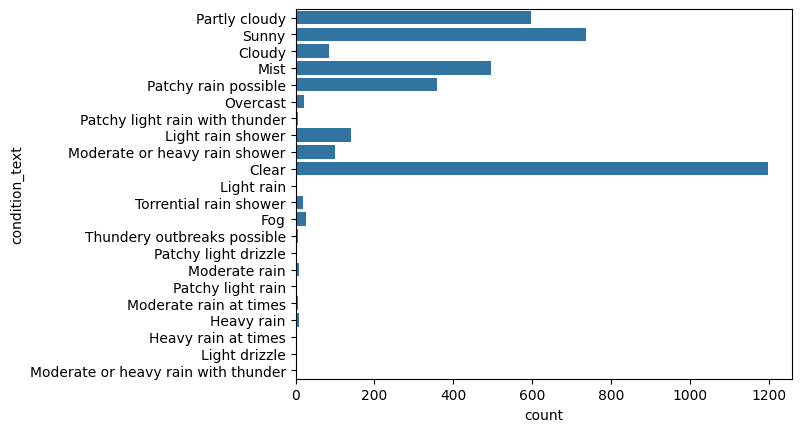

In [13]:
sb.countplot(df['condition_text'])

In [14]:
print(df['condition_text'].dtype)

object


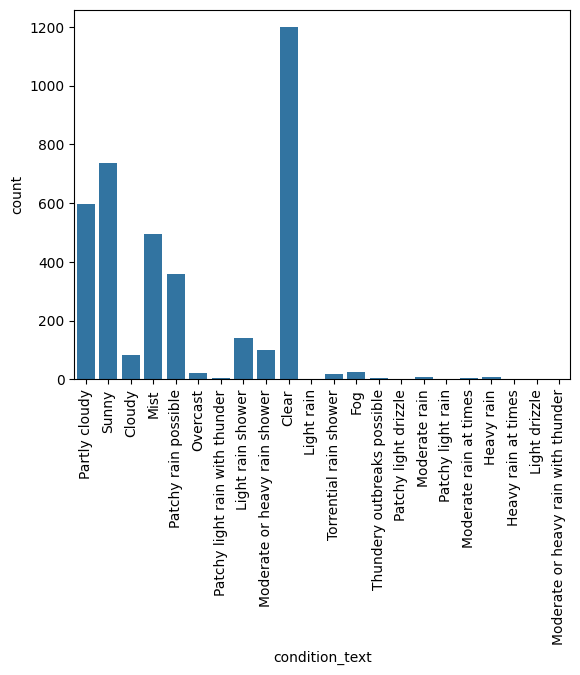

In [15]:
sb.countplot(x='condition_text', data=df)
plt.xticks(rotation=90)
plt.show()

In [16]:
df.condition_text.value_counts()

condition_text
Clear                                  1198
Sunny                                   737
Partly cloudy                           597
Mist                                    495
Patchy rain possible                    359
Light rain shower                       140
Moderate or heavy rain shower           100
Cloudy                                   84
Fog                                      26
Overcast                                 22
Torrential rain shower                   20
Moderate rain                             8
Heavy rain                                8
Thundery outbreaks possible               6
Moderate rain at times                    6
Patchy light rain with thunder            5
Light rain                                3
Patchy light rain                         3
Patchy light drizzle                      2
Light drizzle                             2
Moderate or heavy rain with thunder       2
Heavy rain at times                       1
Name: count, dtyp

In [17]:
categories = ['Clear',"Sunny","Parlty Cloudy","Mist","Rain","Cloudy","Fog","Light Rain"]
df.condition_text.replace(to_replace=["Overcast","Cloudy"],value="Cloudy",inplace=True)
df.condition_text.replace(to_replace=['Moderate or heavy rain shower ','Heavy rain','Moderate rain','Moderate or heavy rain with thunder','Heavy rain at times','Moderate rain at times','Thundery outbreaks possible','Moderate or heavy rain shower'],value="Rain",inplace=True)
df.condition_text.replace(to_replace=['Patchy rain possible','Torrential rain shower','Light rain shower','Patchy light rain with thunder','Light rain','Patchy light rain','Light drizzle','Patchy light drizzle'],value="Light Rain",inplace=True)
df.condition_text.replace(to_replace="Clear",value="Clear",inplace=True)
df.condition_text.replace(to_replace="Sunny",value="Sunny",inplace=True)
df.condition_text.replace(to_replace="Partly Cloudy",value="Partly Cloudy",inplace=True)
df.condition_text.replace(to_replace="Fog",value="Fog",inplace=True)
df.condition_text.replace(to_replace="Mist",value="Mist",inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_14768\2483315910.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.condition_text.replace(to_replace=["Overcast","Cloudy"],value="Cloudy",inplace=True)


In [18]:
df

,temperature_celsius,feels_like,air_quality,humidity,precipitation,visibility,wind_speed,pressure,condition_text
0,27.5,29.7,243.7,67,0.0,10.0,20.5,1008,Partly cloudy
1,27.5,30.0,240.3,70,0.0,10.0,15.5,1008,Sunny
2,26.3,28.2,220.3,70,0.0,10.0,18.4,1009,Partly cloudy
3,25.6,27.6,200.3,76,0.0,10.0,16.9,1009,Cloudy
4,27.2,29.9,257.0,74,0.0,10.0,16.2,1009,Cloudy
...,...,...,...,...,...,...,...,...,...
3819,28.0,28.9,1348.5,79,0.0,3.2,6.1,1003,Mist
3820,19.4,19.4,253.7,99,1.1,10.0,3.6,1004,Light Rain
3821,25.9,28.1,293.7,76,0.6,10.0,23.0,1004,Light Rain
3822,24.1,26.4,198.6,89,0.0,10.0,13.3,1008,Cloudy


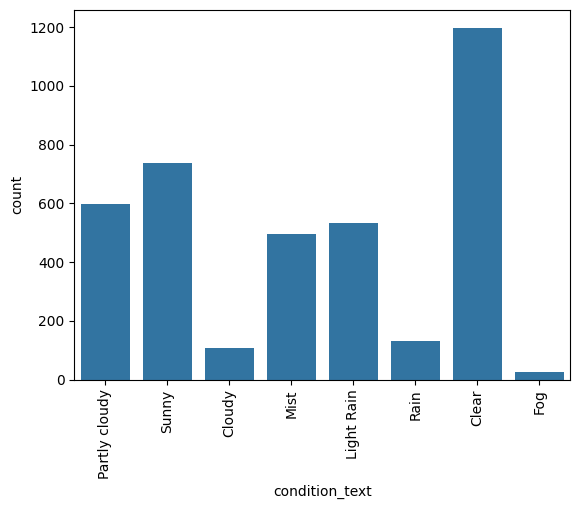

In [19]:
sb.countplot(x='condition_text', data=df)
plt.xticks(rotation=90)
plt.show()

In [20]:
df.condition_text.value_counts()

condition_text
Clear            1198
Sunny             737
Partly cloudy     597
Light Rain        534
Mist              495
Rain              131
Cloudy            106
Fog                26
Name: count, dtype: int64

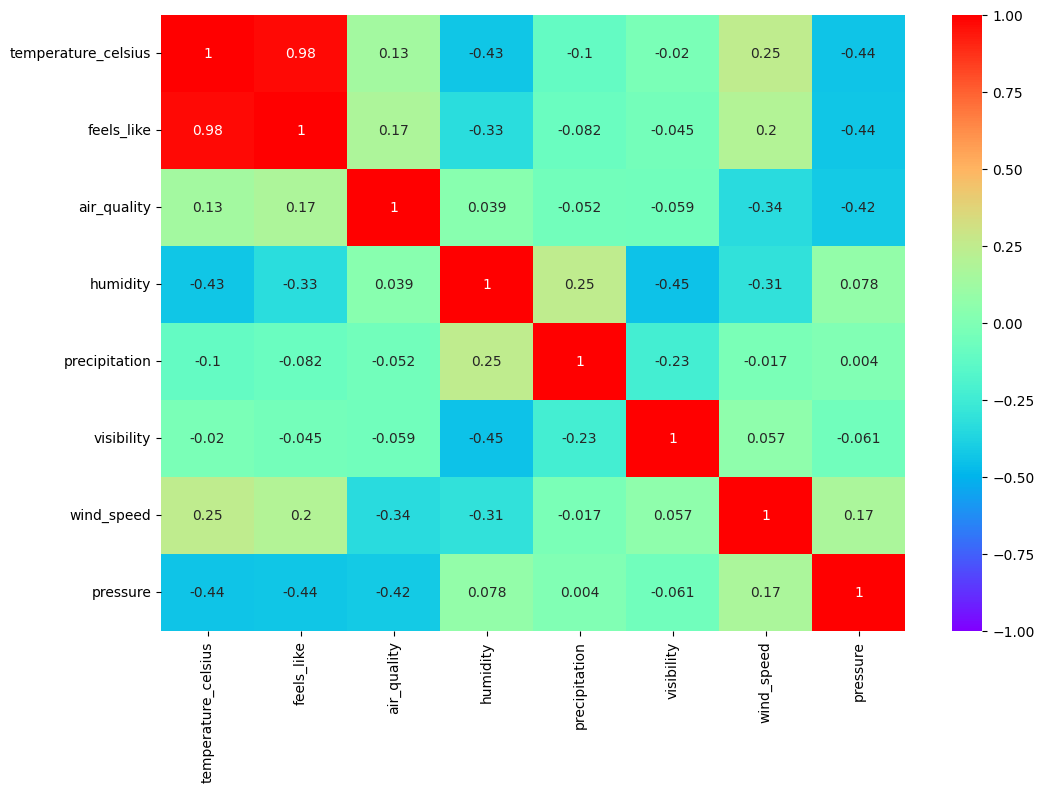

12439

In [21]:
import gc
plt.figure(figsize=(12,8))
fig = sb.heatmap(df.select_dtypes(include=['number']).corr(),annot=True,cmap='rainbow',vmin=-1.0,vmax=1.0)
plt.show(fig)
plt.close('all')
del fig
gc.collect()

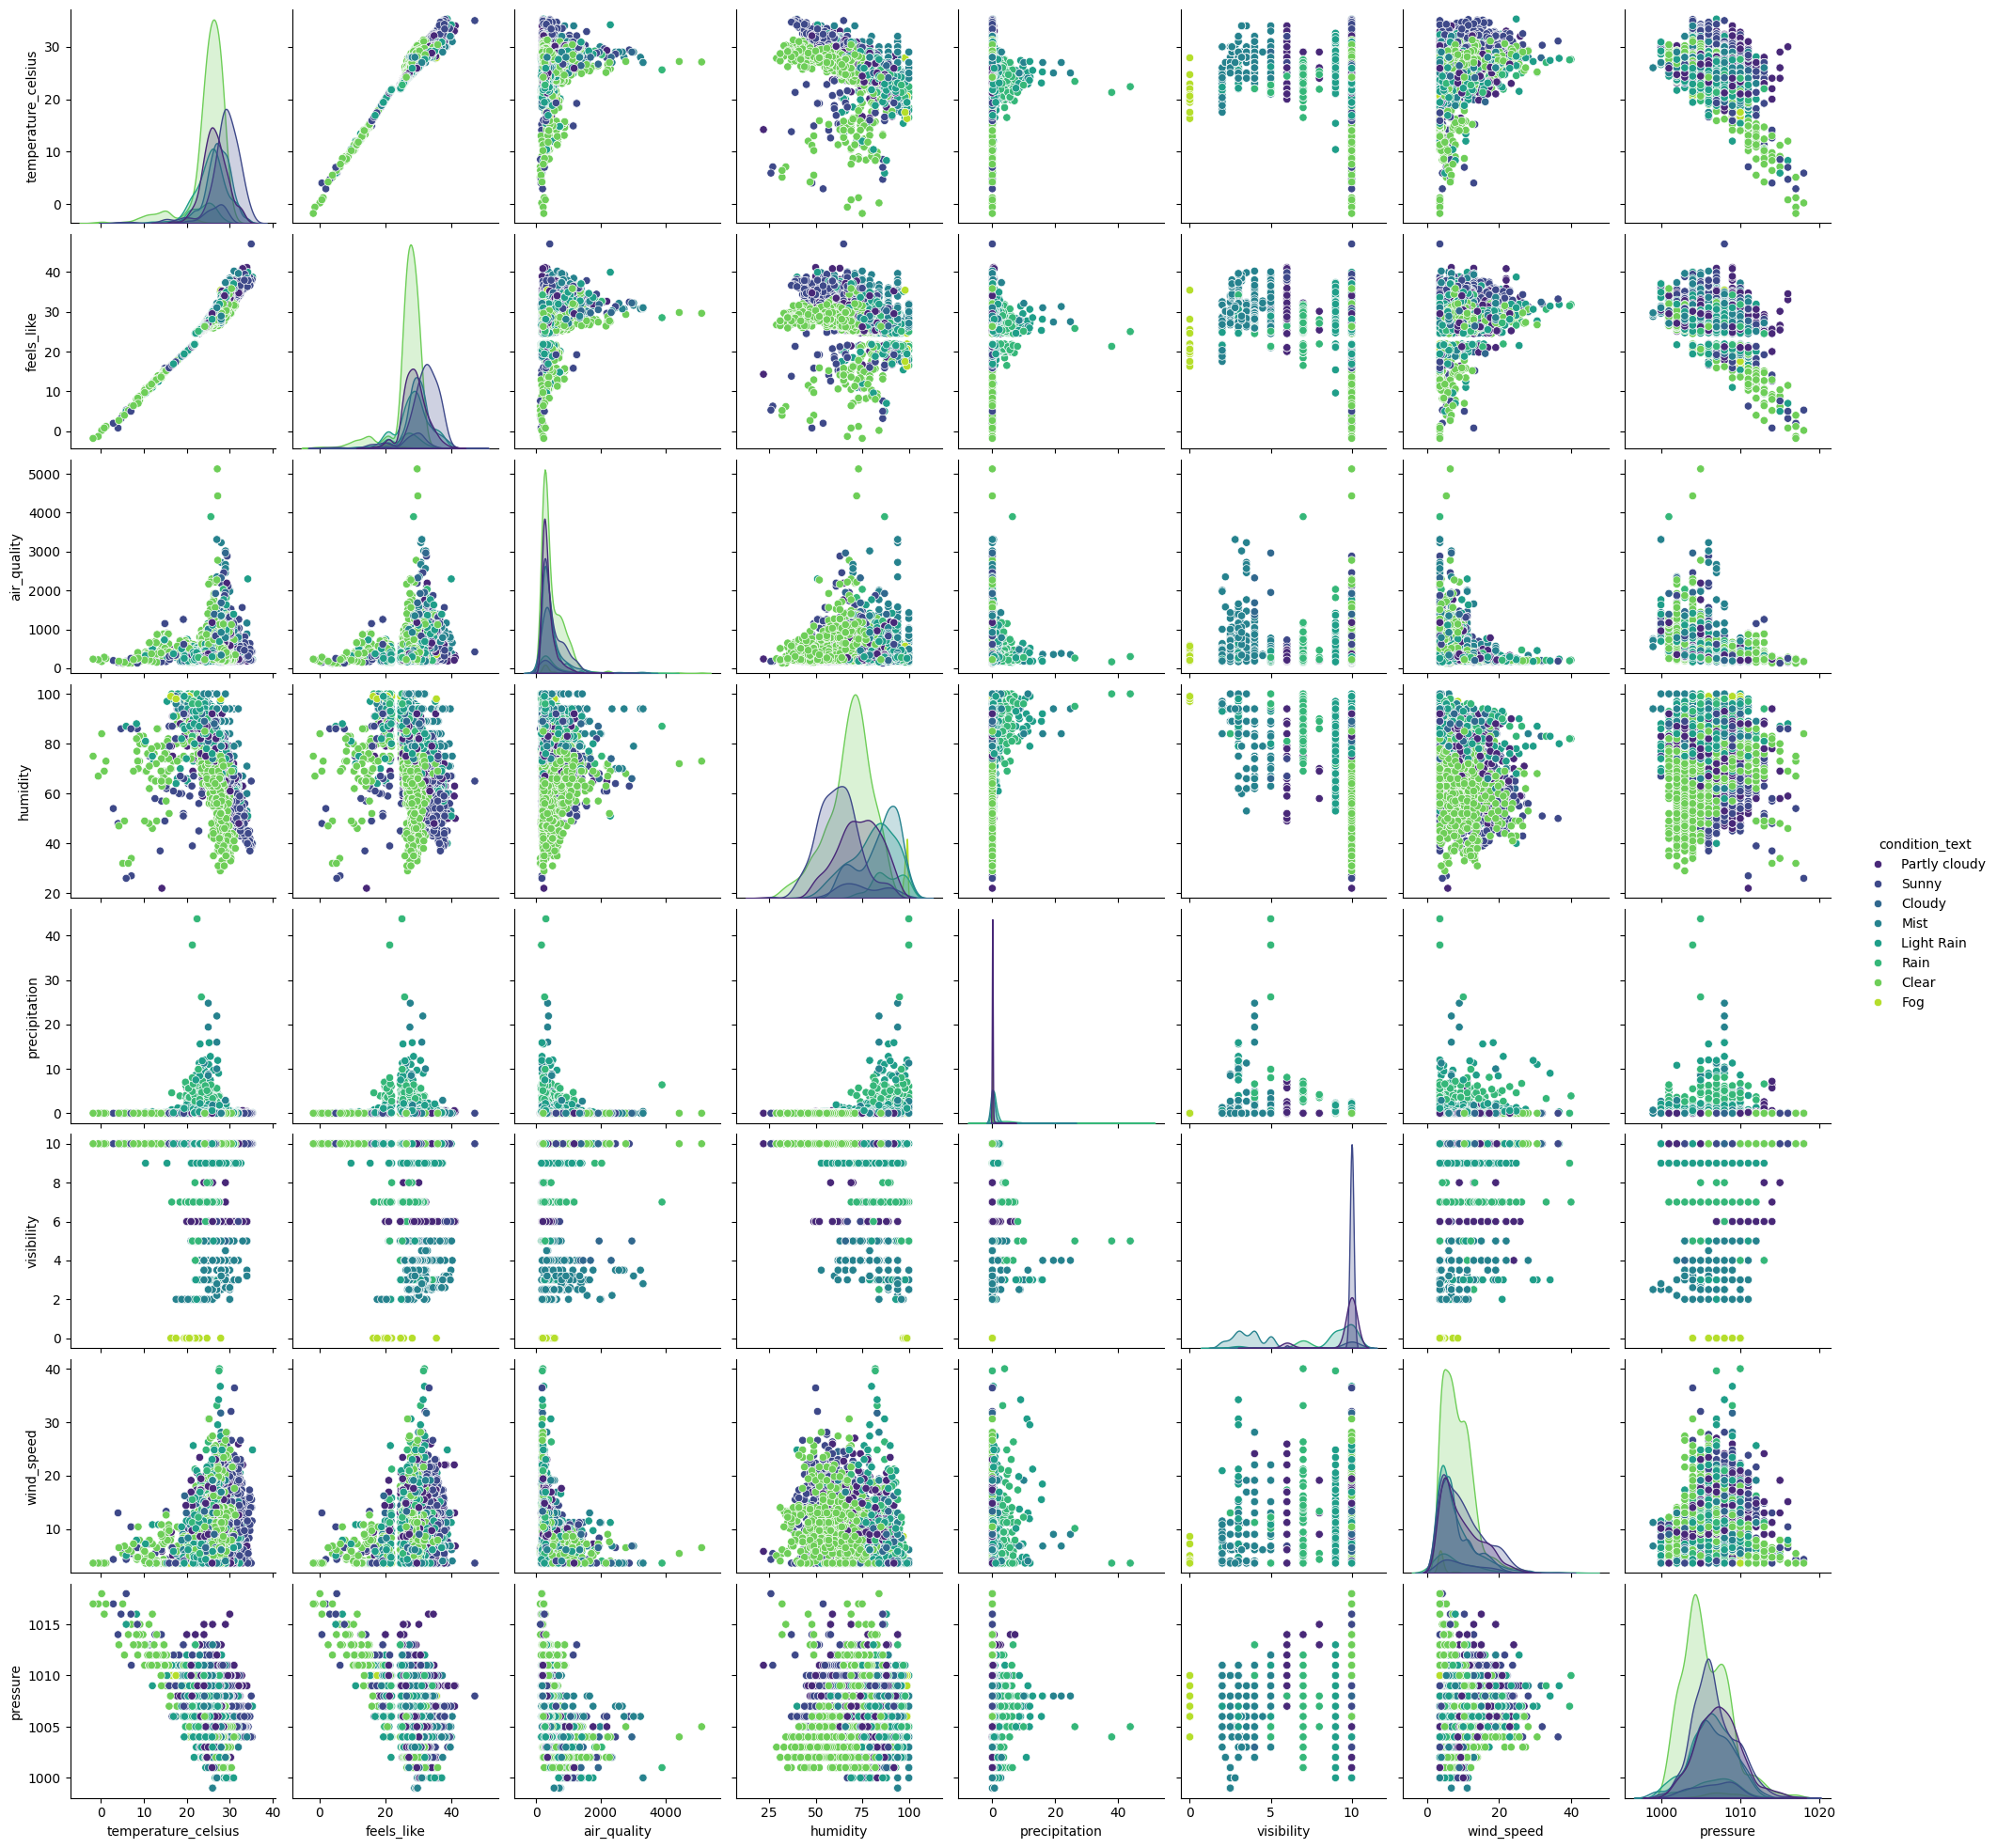

In [22]:
sb.pairplot(df,hue='condition_text',palette='viridis')

In [23]:
x= df.drop(['condition_text'],axis=1)
y= df['condition_text']

In [25]:
y

0       Partly cloudy
1               Sunny
2       Partly cloudy
3              Cloudy
4              Cloudy
            ...      
3819             Mist
3820       Light Rain
3821       Light Rain
3822           Cloudy
3823            Clear
Name: condition_text, Length: 3824, dtype: object

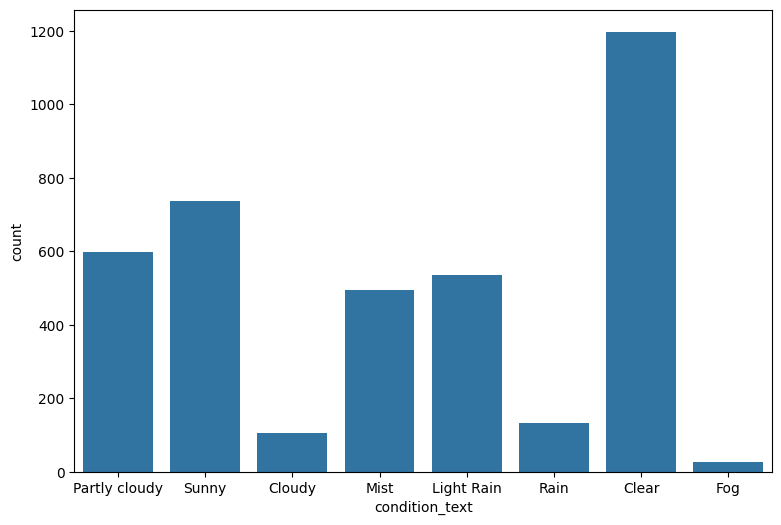

In [26]:
plt.figure(figsize=(9,6))
fig = sb.countplot(x=y)
plt.show(fig)

In [27]:
y.value_counts()

condition_text
Clear            1198
Sunny             737
Partly cloudy     597
Light Rain        534
Mist              495
Rain              131
Cloudy            106
Fog                26
Name: count, dtype: int64

In [28]:
from collections import Counter
print(Counter(y))

Counter({'Clear': 1198, 'Sunny': 737, 'Partly cloudy': 597, 'Light Rain': 534, 'Mist': 495, 'Rain': 131, 'Cloudy': 106, 'Fog': 26})


In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [30]:
print("Shape of the training set:",x_train.shape)
print("Shape of the testing set:",x_test.shape)

Shape of the training set: (3059, 8)
Shape of the testing set: (765, 8)


In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
model = RandomForestClassifier()

In [33]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [38]:
y_pred = model.predict([[27.7,30.5,267.4,71,0.03,11.0,7.6,1008]])

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [39]:
y_pred

array(['Sunny'], dtype=object)

In [40]:
import joblib
import pickle
prediction_model = "model.pkl"
joblib.dump(model,prediction_model)

['model.pkl']